## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import config
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings

from annotations import *
from density_maps import create_and_save_density_maps
from utils.input_output.io import save_np_arrays, load_np_arrays, load_images
from utils.preprocessing.misc import gaussian_smoothing

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. Datasets

### 2.1 ShanghaiTech Dataset

#### ShanghaiTech (Part_B)

In [4]:
DATASET_PATH = '../../datasets/shanghai_tech/part_B'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_DOTS_MAT_PATH = f'{TRAIN_PATH}/gt_dots_mat'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'

TEST_PATH = f'{DATASET_PATH}/test'
TEST_IMG_PATH = f'{TEST_PATH}/images'
TEST_GT_DOTS_MAT_PATH = f'{TEST_PATH}/gt_dots_mat'
TEST_GT_DOTS_PATH = f'{TEST_PATH}/gt_dots'
TEST_GT_DENSITY_MAPS_PATH = f'{TEST_PATH}/gt_density_maps'

In [5]:
!rm -rf $TRAIN_GT_DOTS_PATH
!rm -rf $TRAIN_GT_DENSITY_MAPS_PATH
!rm -rf $TEST_GT_DOTS_PATH
!rm -rf $TEST_GT_DENSITY_MAPS_PATH

!mkdir $TRAIN_GT_DOTS_PATH
!mkdir $TRAIN_GT_DENSITY_MAPS_PATH
!mkdir $TEST_GT_DOTS_PATH
!mkdir $TEST_GT_DENSITY_MAPS_PATH

In [6]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../../datasets/shanghai_tech/part_B
['test', 'train']


In [7]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../../datasets/shanghai_tech/part_B/train
['gt_density_maps', 'gt_dots', 'gt_dots_mat', 'images']


In [8]:
train_img_names = sorted(os.listdir(TRAIN_IMG_PATH))
train_gt_dots_mat_names = sorted(os.listdir(TRAIN_GT_DOTS_MAT_PATH))

test_img_names = sorted(os.listdir(TEST_IMG_PATH))
test_gt_dots_mat_names = sorted(os.listdir(TEST_GT_DOTS_MAT_PATH))

print(f'train split: {len(train_img_names)} images')
print(train_img_names[:3])
print(train_gt_dots_mat_names[:3])

print(f'\ntest split: {len(test_img_names)} images')
print(test_img_names[:3])
print(test_gt_dots_mat_names[:3])

train split: 400 images
['IMG_1.jpg', 'IMG_10.jpg', 'IMG_100.jpg']
['GT_IMG_1.mat', 'GT_IMG_10.mat', 'GT_IMG_100.mat']

test split: 316 images
['IMG_1.jpg', 'IMG_10.jpg', 'IMG_100.jpg']
['GT_IMG_1.mat', 'GT_IMG_10.mat', 'GT_IMG_100.mat']


In [9]:
%%time
train_dots_list = get_dots_from_mat_files(TRAIN_GT_DOTS_MAT_PATH, train_gt_dots_mat_names)
test_dots_list = get_dots_from_mat_files(TEST_GT_DOTS_MAT_PATH, test_gt_dots_mat_names)

CPU times: user 264 ms, sys: 60 ms, total: 324 ms
Wall time: 4.08 s


In [10]:
print()
print(train_dots_list[0].dtype, train_dots_list[0].shape)
print('min:', train_dots_list[0].min())
print('max:', train_dots_list[0].max())
print(train_dots_list[0][:3])
print()


int16 (233, 2)
min: 1
max: 1022
[[ 32 753]
 [184 690]
 [344 577]]



#### Save dots images with png format 

In [11]:
train_img_names_png = jpg_to_png(train_img_names)
test_img_names_png = jpg_to_png(test_img_names)

print(train_img_names[:3])
print(train_img_names_png[:3])

['IMG_1.jpg', 'IMG_10.jpg', 'IMG_100.jpg']
['IMG_1.png', 'IMG_10.png', 'IMG_100.png']


In [12]:
%%time
train_img_shapes = get_img_shapes(TRAIN_IMG_PATH, train_img_names)
test_img_shapes = get_img_shapes(TEST_IMG_PATH, test_img_names)

save_dots_images(train_dots_list, train_img_shapes, train_img_names_png, TRAIN_GT_DOTS_PATH)
save_dots_images(test_dots_list, test_img_shapes, test_img_names_png, TEST_GT_DOTS_PATH)

CPU times: user 20.2 s, sys: 1.07 s, total: 21.3 s
Wall time: 21.6 s


#### Load dots images (.png)

In [13]:
%%time
train_dots_images = load_dots_images(TRAIN_GT_DOTS_PATH, train_img_names_png)
test_dots_images = load_dots_images(TEST_GT_DOTS_PATH, test_img_names_png)

print(len(train_dots_images), train_dots_images[0].shape, train_dots_images[0].dtype,
      train_dots_images[0].min(), train_dots_images[0].max(), train_dots_images[0].sum())

400 (768, 1024) float64 0.0 1.0 233.0
CPU times: user 2.11 s, sys: 476 ms, total: 2.59 s
Wall time: 2.67 s


#### Create and save density maps (.npy)

In [14]:
%%time
create_and_save_density_maps(train_dots_images, config.SHANGHAI_TECH_PART_B_SIGMA,
                             train_img_names, TRAIN_GT_DENSITY_MAPS_PATH)
create_and_save_density_maps(test_dots_images, config.SHANGHAI_TECH_PART_B_SIGMA,
                             test_img_names, TEST_GT_DENSITY_MAPS_PATH)

CPU times: user 32.6 s, sys: 3.23 s, total: 35.8 s
Wall time: 1min 45s


#### Load some train images and density maps

In [15]:
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=3)
print(len(train_images))

3


In [16]:
train_gt_density_maps = load_np_arrays(TRAIN_GT_DENSITY_MAPS_PATH, num=3)
print(len(train_gt_density_maps))

3


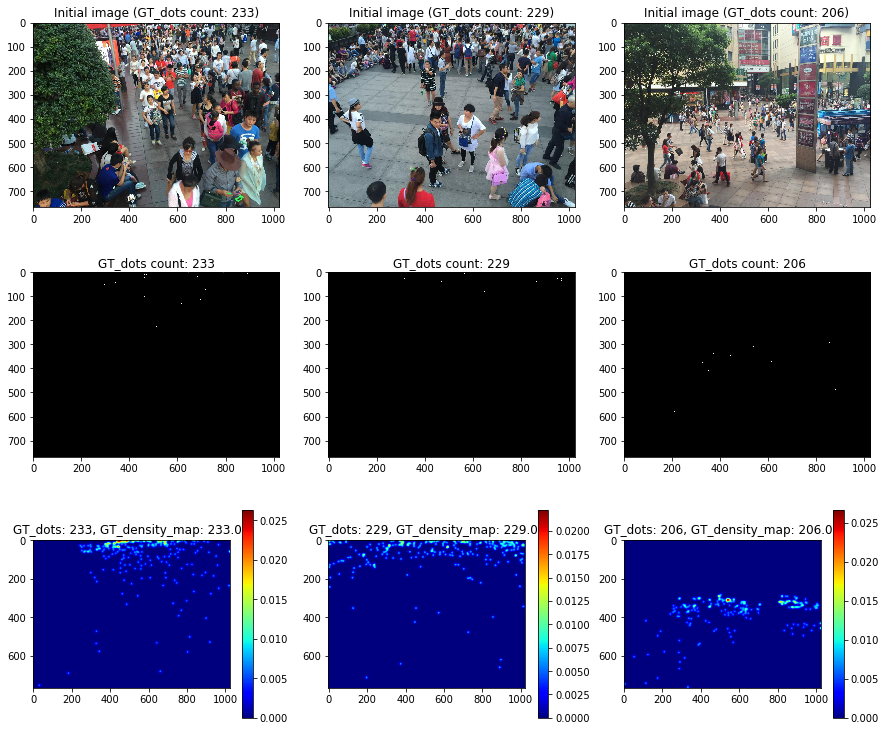

In [17]:
NUM_PLOTS = 3
plt.figure(figsize=(15, 13))

for i in range(NUM_PLOTS):
    count = train_dots_images[i].sum().astype(np.int)
    
    plt.subplot(3, NUM_PLOTS, i + 1)
    plt.title(f'Initial image (GT_dots count: {count})')
    plt.imshow(train_images[i])
    
    plt.subplot(3, NUM_PLOTS, NUM_PLOTS + i + 1)
    plt.title(f'GT_dots count: {count}')
    plt.imshow(train_dots_images[i], cmap='gray')
    
    plt.subplot(3, NUM_PLOTS, 2 * NUM_PLOTS + i + 1)
    plt.title(f'GT_dots: {count}, GT_density_map: {train_gt_density_maps[i].sum():.2f}')
    plt.imshow(train_gt_density_maps[i], cmap='jet')
    plt.colorbar()